## AutoMLs

- [LazyPredict](https://lazypredict.readthedocs.io/)
- [AutoSklearn](https://automl.github.io/auto-sklearn/master/examples/index.html)
- [AutoKeras](https://autokeras.com/)

Also https://www.automl.org/automl/

As of 1/28/2021, I had to buuld my own lazypredict, as it doesn't work with the latest sklearn, which is needed by autosklearn
### LazyPredict

In [21]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [22]:
# Load dataset
data = load_breast_cancer()
X = data.data
y= data.target

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 28/28 [00:04<00:00,  6.24it/s]


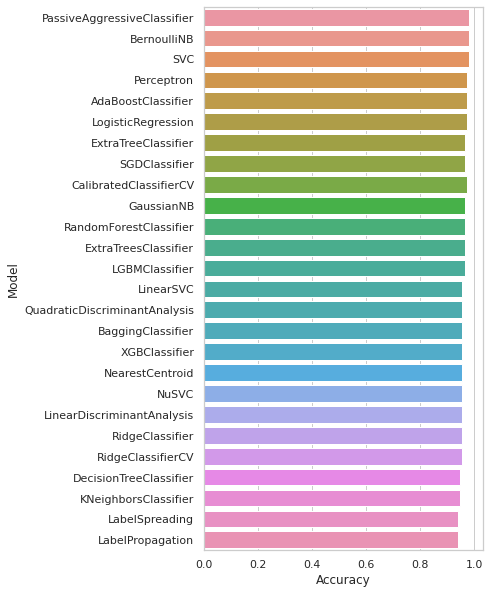

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)

In [8]:
# Import libraries
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

# Load dataset
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=42)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 41/41 [00:02<00:00, 14.15it/s]


[(0.0, 1.0)]

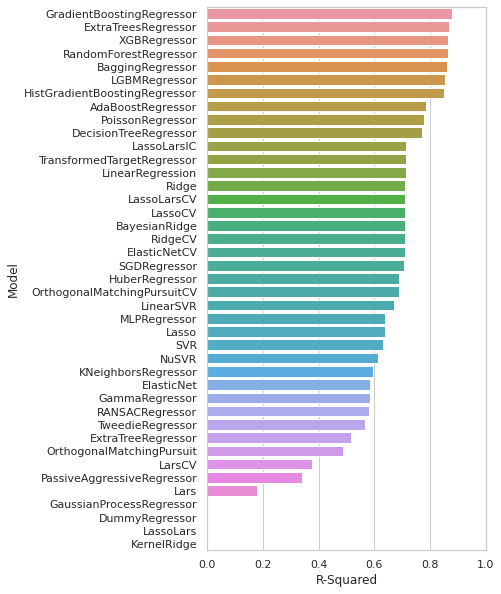

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

models["R-Squared"] = [0 if i < 0 else i for i in models.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="R-Squared", data=models)
ax.set(xlim=(0, 1))

### AutoSklearn
#### Regrerssion

In [15]:
import sklearn.datasets
import sklearn.metrics
import autosklearn.regression

X, y = sklearn.datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test =  sklearn.model_selection.train_test_split(X, y, random_state=1)

In [18]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out',
)
# automl.fit(X_train, y_train, dataset_name='boston')